<i><b>Public AI</b></i>
<br>
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 1. Numpy Basis**
# Section 7. Numpy을 활용하여 머신러닝 구현하기 - KNN 분류기


### _Objective_
1. **Machine Learning**: 머신러닝이 무엇인지 간단하게 알아봅니다.<br>
2. **KNN 알고리즘 개괄** : 머신러닝 방법론 중 간단하면서 중요한 방법론인 KNN(K Nearest Neighborhood)의 개념을 배웁니다. <br>
3. **KNN Numpy로 구현** : Numpy를 이용하여 KNN을 구현해봅니다. 

In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

# \[ 1. Machine Learning \]

머신러닝은 인공지능의 한 분야로, 컴퓨터가 학습할 수 있도록 하는 알고리즘과 기술을 개발하는 분야로서 데이터의 평가를 뜻하는 표현(representation)과 아직 알 수 없는 데이터에 대한 처리를 뜻하는 일반화(generalization)에 중점을 두고 있으며, 기본적으로 알고리즘을 이용해 데이터를 분석하고, 분석을 통한 학습, 학습을 기반으로한 판단이나 예측을 수행합니다.<br>

머신러닝은 크게 지도학습(supervised learning), 비지도학습(unsupervised learning), 강화학습(reinforcement learning)으로 구분됩니다.<br>
보통 데이터의 특징과 목적에 따라 학습방법을 선택하는데, 지도학습은 데이터에 label이 주어진 상태에서 컴퓨터를 학습시키고 label이 있는 학습데이터를 가지고 여러가지 알고리즘을 통해 판단이나 예측을 수행합니다.<br>

지도학습은 크게 `회귀(regression)`와 `분류(classification)`로 나뉘는데 회귀와 분류는 모두 지도학습 모델이기 때문에 label이 있는 입력데이터로 학습한다는 공통점이 있습니다. 분류와 회귀의 차이점으로는 분류는 결과값이 고정되어 있고, 회귀는 그 결과값이 데이터셋의 범위 내 어떠한 값도 가능하다는 점이 있습니다. 이는 아래 이미지를 보면 확실하게 알 수 있습니다.

<img src="https://i.imgur.com/s0e6Lnj.png" width="800" height="600"/><br>

더 구체적으로 보면 분류모델은 label이 적힌 학습데이터로 학습한 후 새로 입력된 데이터가 속한 그룹을 찾아내는 것이 목적이므로 분류 모델의 결과값은 반드시 학습데이터의 label중 하나입니다. 예를 들어 '원숭이', '고양이', '강아지', '곰'이라는 label로 구성된 데이터셋에 곰사진을 입력했을 때 결과값은 학습데이터안의 label 중 하나인 '곰'이 되어야 하는것입니다.<br>

회귀모델은 label된 학습데이터를 가지고 특성(feature)과 label의 관계를 함수식으로 표현하는 것이 목적입니다. 함수식을 사용 회귀모델에서는 어떤 특정한 패턴을 찾아내고 일정한 패턴 내에서 무엇인가를 예측합니다. 이번시간에는 가장 간단한 머신러닝 알고리즘 중 하나인 KNN 알고리즘에 대해 알아보겠습니다.

# \[ 2. KNN 알고리즘 개괄 \]

KNN 알고리즘은 분류 항목을 이미 알고 있는 데이터 집합에서 상위 K개의 가장 유사한 데이터를 살펴보고, K개의 가장 유사한 데이터들 중 다수결(majority vote)를 통해 새로운 데이터의 분류 항목을 결정하는 알고리즘입니다.

## 예제 데이터 )  영화 분석 결과



#### 데이터 ) 각 영화 별 싸움 횟수와 키스 횟수

| 영화 제목 | the number of Kick | The number os Kiss | Type |
| ------  | ----| ----| --- |
| 냉정과열정사이 | 3 | 104 | Romance|
| 바람과함께사라지다 | 2 | 100 | Romance |
| 아름다운 여인 | 1 | 81 | Romance |
| 인정사정볼것없다 | 101 | 10 | Action |
| 놈놈놈 | 99 | 5 | Action |
| 화랑 | 98 | 2 | Action |
| 뜨거운 가슴으로 | 25 | 87 | ? |

In [2]:
# 0번째 열 : 킥 횟수, 1번째 열 : 키스 횟수
dataset = np.array([
    [3, 104],
    [2, 100],
    [1, 81],
    [101, 10],
    [99, 5],
    [98, 2],
])

labels = np.array(['Romance','Romance','Romance',
          'Action','Action','Action'])

inX = np.array([25, 87])

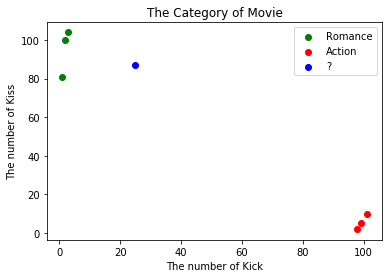

In [3]:
plt.title("The Category of Movie")
plt.scatter(dataset[:3,0],dataset[:3,1],label='Romance',
            c='g')
plt.scatter(dataset[3:,0],dataset[3:,1],label='Action',
            c='r')
plt.scatter(25,87,label="?",
            c='b')


plt.xlabel('The number of Kick')
plt.ylabel('The number of Kiss')
plt.legend()
plt.show()

파란 색의 경우는 어느 카테고리에 속할까요? 이 두 가지 특징 "킥 횟수"와 "키스 횟수"로 미루어 판단하건대, Romance에 가까운 작품으로 판단됩니다. 이를 좀 더 정량적으로 판단하면, 자기의 값과 비슷한, 인근 K개(임의의 수, 보통 20개 미만)의 데이터를 뽑아오고, 그 중에서 다수결을 통해 새로운 데이터의 분류 항목을 결정할 수 있을 것입니다. 이러한 분류 방법을 K-NN이라고 합니다. 

# \[ 3. KNN Numpy로 구현 \]

KNN의 알고리즘 순서는 다음과 같습니다. 

1. 우리가 분류항목을 알고자 하는 점(inX)와 알고 있는 점들(dataset)과의 모든 점 거리를 계산
2. 오름 차순으로 거리의 길이를 정렬
3. inX와의 거리가 가장 짧은 K개의 아이템 추출
4. K개의 아이템에서 가장 많은 분류 항목 찾기
5. 해당 항목 반환

KNN의 각 단계별로 코드를 작성해 봅시다. 

## 1. 각 단계별로 Numpy Code 작성하기

### (1) 우리가 분류항목을 알고자 하는 점 (inX)와 알고 있는 점들(dataset)과의 모든 점 거리를 계산


거리 공식은 아래와 같습니다. 

우리는 알고자 하는 점(inX)와 알고 있는 점들(dataset) 전부와의 거리를 측정해야 합니다.

$$
point1 = (x_1,y_1), point2 = (x_2,y_2)\mbox{일 때}\\
distance\_between\_point1\_and\_point2 = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
$$

In [4]:
# fix me! # with python for 구문

array([ 27.80287755,  26.41968963,  24.73863375, 108.1896483 ,
       110.45361017, 112.04463396])

위는 영화 "뜨거운 가슴으로"와 다른 데이터 셋과의 거리 차이를 의미합니다.

| 영화 제목 | the number of Kick | The number os Kiss | Type | distance from inX|
| ------  | ----| ----| --- | --- |
| 냉정과열정사이 | 3 | 104 | Romance| 27.8|
| 바람과함께사라지다 | 2 | 100 | Romance | 26.4|
| 아름다운 여인 | 1 | 81 | Romance |24.7|
| 인정사정볼것없다 | 101 | 10 | Action |108.2|
| 놈놈놈 | 99 | 5 | Action |110.5|
| 화랑 | 98 | 2 | Action |112.0|


In [5]:
# broadcasting을 이용하면 보다 간결하고 빠른 코드를 작성할 수 있습니다.
# fix me! # with Numpy broadcasting

array([ 27.80287755,  26.41968963,  24.73863375, 108.1896483 ,
       110.45361017, 112.04463396])

numpy로 코드를 짠다는 것은 단순히 코드의 길이가 짧아지는 것 뿐만아니라, 성능에도 지대한 영향을 미칩니다.

In [6]:
%%timeit
# fix me! # 처음에 짰던 파이썬 코드를 넣고 걸린 시간을 확인해보세요

36.7 µs ± 721 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%%timeit
# fix me! # Numpy로 짠 코드를 넣고 걸린 시간을 위와 비교해보세요

7.04 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


같은 내용이지만, Numpy로 짠 것이 5배나 빠릅니다. 이 때문에, 파이썬에서 빠르고 가독성이 있는 코드를 작성하기 위해서는, 최대한 For구문을 지양하고, Numpy로 코드를 작성해야 합니다.

### (2) 오름 차순으로 거리의 길이를 정렬


In [8]:
# 오름차순으로 정렬된 인덱스 순을 반환
# fix me!

array([2, 1, 0, 3, 4, 5])

|인덱스 | 영화 제목 | the number of Kick | The number os Kiss | Type | distance from inX|
|---| ------  | ----| ----| --- | --- |
|0| 냉정과열정사이 | 3 | 104 | Romance| 27.8|
|1| 바람과함께사라지다 | 2 | 100 | Romance | 26.4|
|2| 아름다운 여인 | 1 | 81 | Romance |24.7|
|3| 인정사정볼것없다 | 101 | 10 | Action |108.2|
|4| 놈놈놈 | 99 | 5 | Action |110.5|
|5| 화랑 | 98 | 2 | Action |112.0|


반환된 인덱스 순에 따르면, 아름다운 여인, 바람과함께사라지다, 냉정과열정사이,인정사정볼것없다,놈놈놈,화랑 순으로 정렬됩니다.

### (3) inX와의 거리가 가장 짧은 K개의 아이템 추출

이번 예제에서는 제일 가까운 4개를 추출해보도록 하겠습니다.

In [9]:
# fix me! # 가장 가까운 4개의 label 추출하기

### (4) K개의 아이템에서 가장 많은 분류 항목 찾기

In [11]:
# K 개의 아이템에서 각 항목이 몇번씩 등작했는지 count
# fix me! # python code를 사용해 {'라벨' : 등장횟수} 형태의 딕셔너리 형태로 저장하기

{'Romance': 3, 'Action': 1}

In [12]:
# fix me! # 위 딕셔너리에서 가장 많이 등장한 라벨 찾기

'Romance'

numpy를 이용해, 위를 보다 간단하게 작성하면 아래와 같이 작성할 수 있습니다.

In [13]:
# fix me! # numpy를 사용해 각 라벨들이 몇번 등장했는지 count

(array(['Action', 'Romance'], dtype='<U7'), array([1, 3]))

In [14]:
# fix me! # 가장 많이 등장한 라벨 찾기

'Romance'

## 2. 전체 Numpy Code 작성하기

In [15]:
def classify_knn(inX, dataset, labels, K):
    # (1) 우리가 분류항목을 알고자 하는 점 (inX)와 
    # 알고 있는 점들(dataset)과의 모든 점 거리를 계산
    # fix me!
    
    # (2) 오름 차순으로 거리의 길이를 정렬
    # fix me!
    
    # (3) inX와의 거리가 가장짧은 K개의 아이템 추출
    # fix me!
    
    # (4) K개의 아이템에서 가장 많은 분류 항목 찾기
    # fix me!
    
    # (5) 해당 항목 반환
    return # fix me!

In [16]:
# 킥 횟수가 52번, 키스 횟수가 10번인 작품
# fix me!

'Action'

In [17]:
# 킥 횟수가 19번, 키스 횟수가 72번인 작품
# fix me!

'Romance'

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/03/04

---